In [27]:
data = read.csv("day.csv")
model <- lm(data$cnt~data$temp + data$atemp  + data$hum + data$windspeed + data$registered)


Call:
lm(formula = data$cnt ~ data$temp + data$atemp + data$hum + data$windspeed + 
    data$registered)

Residuals:
    Min      1Q  Median      3Q     Max 
-1062.4  -336.1  -160.2   132.4  2297.6 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      409.02802  150.54353   2.717  0.00674 ** 
data$temp       1020.25505  900.17872   1.133  0.25742    
data$atemp       974.96469 1018.42977   0.957  0.33872    
data$hum        -780.96262  156.05786  -5.004 7.04e-07 ***
data$windspeed  -920.56777  290.11522  -3.173  0.00157 ** 
data$registered    1.03746    0.01652  62.795  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 560.9 on 725 degrees of freedom
Multiple R-squared:  0.9167,	Adjusted R-squared:  0.9162 
F-statistic:  1596 on 5 and 725 DF,  p-value: < 2.2e-16


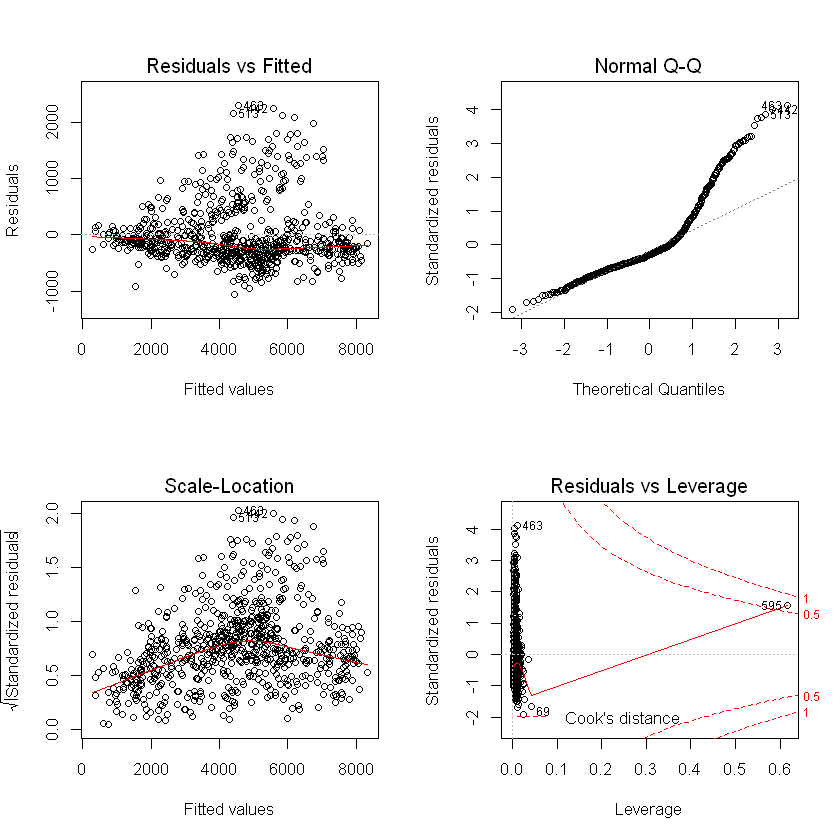

In [28]:
summary(model)
par(mfrow=c(2, 2))
plot(model)

In [29]:
model.backward <- step(model, direction="backward", trace=1)

Start:  AIC=9259.87
data$cnt ~ data$temp + data$atemp + data$hum + data$windspeed + 
    data$registered

                  Df  Sum of Sq        RSS     AIC
- data$atemp       1     288367  228410863  9258.8
- data$temp        1     404194  228526690  9259.2
<none>                           228122496  9259.9
- data$windspeed   1    3168113  231290609  9267.9
- data$hum         1    7879875  236002371  9282.7
- data$registered  1 1240728405 1468850901 10619.2

Step:  AIC=9258.79
data$cnt ~ data$temp + data$hum + data$windspeed + data$registered

                  Df  Sum of Sq        RSS     AIC
<none>                           228410863  9258.8
- data$windspeed   1    3627051  232037914  9268.3
- data$hum         1    7693854  236104717  9281.0
- data$temp        1   58026282  286437145  9422.3
- data$registered  1 1248486338 1476897201 10621.2


In [30]:
model.forward <- step(model, direction="forward", trace=1, scope= ~data$temp + data$atemp + data$hum + data$windspeed + data$casual + data$registered)

Start:  AIC=9259.87
data$cnt ~ data$temp + data$atemp + data$hum + data$windspeed + 
    data$registered

              Df Sum of Sq       RSS    AIC
+ data$casual  1 228122496         0 -39146
<none>                     228122496   9260

Step:  AIC=-39146.42
data$cnt ~ data$temp + data$atemp + data$hum + data$windspeed + 
    data$registered + data$casual



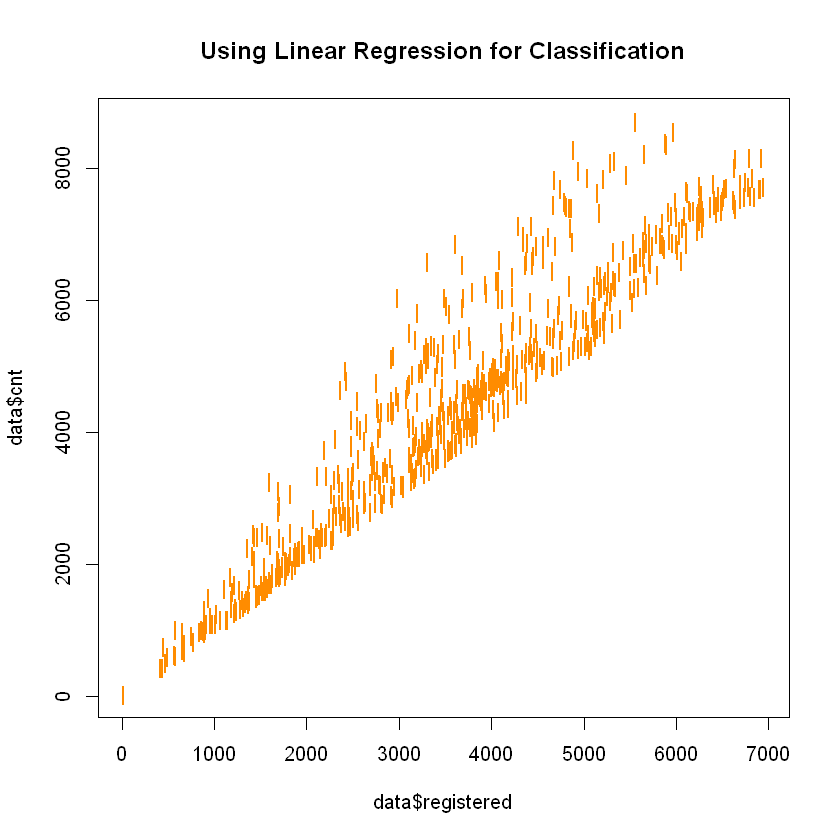

ERROR: Error in abline(model_lm, lwd = 3, col = "dodgerblue"): object 'model_lm' not found


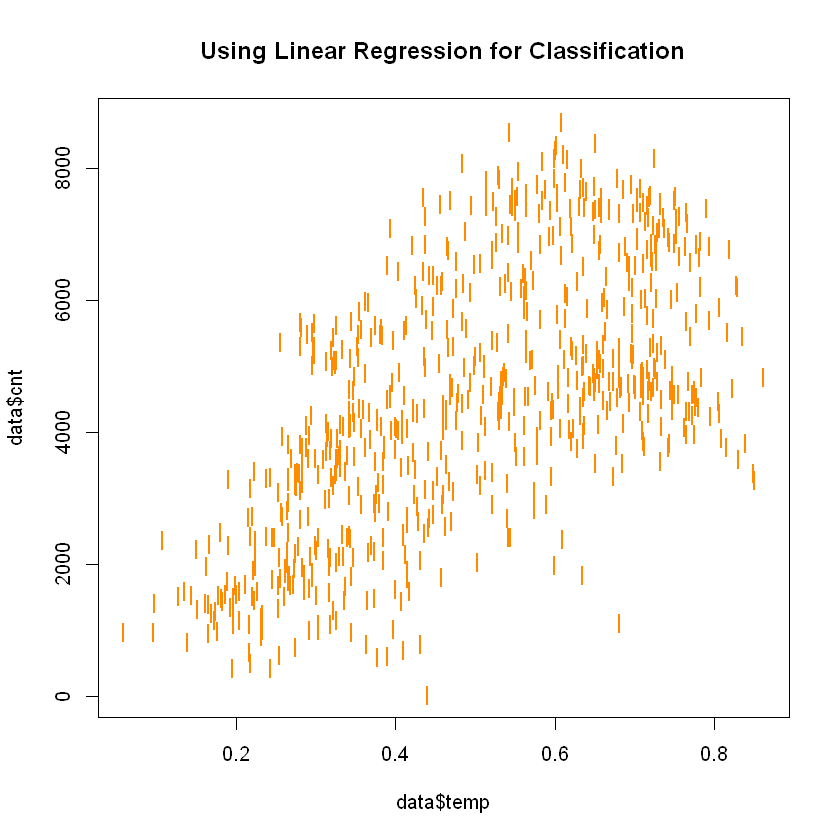

In [31]:
plot(data$cnt~data$registered + data$temp, data = data, 
     col = "darkorange", pch = "|",
     main = "Using Linear Regression for Classification")
abline(model_lm, lwd = 3, col = "dodgerblue")